In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd

import viz # curriculum viz example code

np.random.seed(123)

In [2]:
stats.poisson(2)


<BarContainer object of 1 artists>

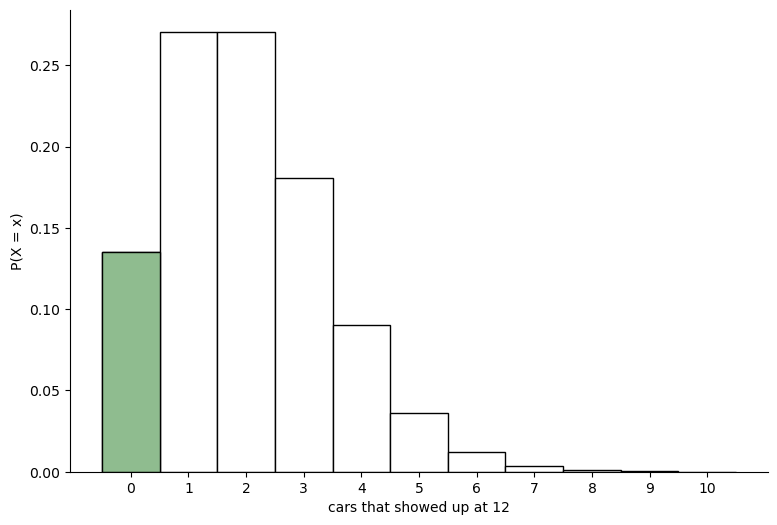

In [3]:
x = range(11)
y = stats.poisson(2).pmf(x)

plt.figure(figsize=(9, 6))
plt.bar(x, y, edgecolor='black', color='white', width=1)
plt.xticks(x)
plt.ylabel('P(X = x)')
plt.xlabel('cars that showed up at 12')
plt.bar(0, stats.poisson(2).pmf(0), width=1, color='darkseagreen', edgecolor='black')


In [4]:
stats.poisson(2).pmf(0) ##probability that no cars show up

0.1353352832366127

In [5]:
stats.poisson(2).sf(2) ##probability that 3 or more s

0.32332358381693654

In [6]:
stats.poisson(2).sf(0) ##probability that at least 1 shows up

0.8646647167633873

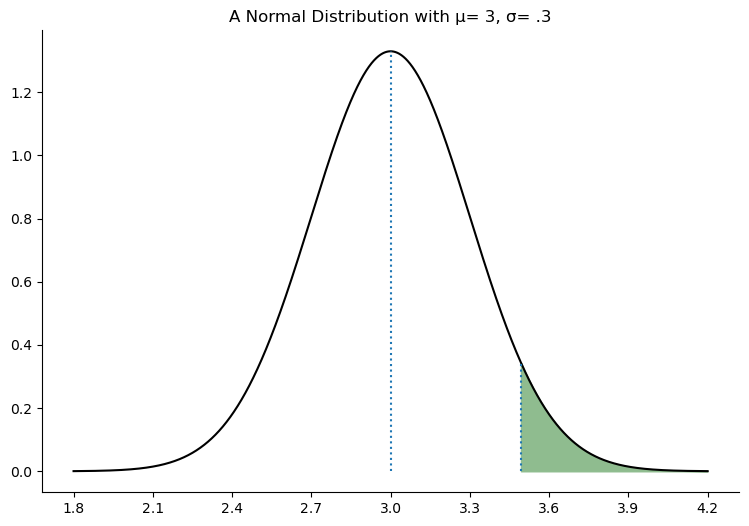

In [7]:
gpa = stats.norm(3, .3)
top_10_percent_cutoff = gpa.ppf(.95)
x = np.arange(3 - 4*.3, 3 + 4*.3, .001)
y = gpa.pdf(x)

plt.plot(x, y, color='black')
plt.vlines([3, gpa.ppf(.95)], 0, [gpa.pdf(3), gpa.pdf(gpa.ppf(.95))], linestyle=':')
plt.title('A Normal Distribution with μ= 3, σ= .3')
plt.xticks(np.arange(3 - 4*.3, 3 + 4*.3, .3))

x1 = np.arange(top_10_percent_cutoff, 3 + 4*.3, .001)
y1 = gpa.pdf(x1)


plt.fill_between(x1, y1, color='darkseagreen')


In [8]:
gpa.ppf(.95) ##gives gpa that is in the 95th percentile

3.4934560880854417

In [9]:
gpa.ppf(.15) #gpa of lower 15

2.689069983151863

In [10]:
lower = gpa.ppf(.20)

In [11]:
upper = gpa.ppf(.30)

In [12]:
gpa.pdf(3.5)

0.3315904626424956

In [13]:
print(lower)
print('to')
print(upper) ##range of thrid decile
# therefore the gpa is between the decile

2.7475136299281258
to
2.842679846187588


In [14]:
97/4326    
    

0.022422561257512713

In [15]:
marketing = stats.poisson(.02).sf(.02)

In [16]:
marketing #3 this is roughly the probability that the click rate will be what the question asked

0.0198013266932447

In [17]:
#4 probability you will get 60 correct of randomly writng the answer
my_binomial_distribution = stats.binom(60, .01)


In [18]:
my_binomial_distribution.sf(0) #4 this is the probability that at least 1 of the fist 60 are correct

0.45284335760923855

In [19]:
cleaning_the_place = stats.binom(59, .03) #5 probability that the place will get cleaned on any day
cleaning_the_place.sf(0)

0.8342199288437352

In [20]:
cleaning_the_place.pmf(0)
#5 this is the probability that no one will clean the station on any given day

0.16578007115626453

In [21]:
(cleaning_the_place.pmf(0)) ** 2 
#5 probability that it will go uncleaned for 2 days

0.02748303199257613

In [22]:
(cleaning_the_place.pmf(0)) ** 5
#probability that it will go uncleaned for the full week

0.00012521651388091242

In [23]:
#6 you will have an 81.5% chance of having at least 15 minutes left to eat your food.
from env import host, username, password


In [24]:
url = f'mysql+pymysql://{username}:{password}@{host}/employees'


In [25]:
query = "select avg(salary), std(salary) from salaries where to_date > now();"

In [26]:
df = pd.read_sql(query, url)

In [27]:
df

,avg(salary),std(salary)
0,72012.2359,17309.959336


In [28]:
lessthan60k = "select salary from salaries where salary < 60000 and to_date > now();"
morethan95k = "select salary from salaries where salary > 95000 and to_date > now();"
between65n80k = "select salary from salaries where salary between 65000 and 80000 and to_date > now();"
total = "select salary from salaries where to_date > now();"

In [43]:
df1 = pd.read_sql(lessthan60k, url)
df1

,salary
0,43311
1,59755
2,54423
3,50032
4,47017
...,...
64966,45512
64967,52867
64968,44305
64969,52868


In [30]:
counttotal = pd.read_sql(total, url)

In [31]:
count_salaries_lessthan60 = df1.count()
total_salaries = counttotal.count()

In [33]:
count_salaries_lessthan60 / total_salaries
## this is the percent of employees that make less than 60k

salary    0.270573
dtype: float64

In [34]:
count_salaries_morethan95 = pd.read_sql(morethan95k, url)

In [35]:
numeber = count_salaries_morethan95.count()

In [36]:
numeber / total_salaries # percent that make more than 95k

salary    0.108627
dtype: float64

In [37]:
betweensomething = pd.read_sql(between65n80k, url)

In [38]:
countofbetween = betweensomething.count()

In [39]:
countofbetween / total_salaries #probability of ones that are between the two values

salary    0.325157
dtype: float64

In [40]:
salarysarray = counttotal.to_numpy()
salarysarray

array([[88958],
       [72527],
       [43311],
       ...,
       [83441],
       [55003],
       [77303]])

In [41]:
normal_distr = stats.norm(np.mean(salarysarray), np.std(salarysarray))

In [42]:
normal_distr.ppf(.95) #top 5% of earners make this

100484.5852540796

In [ ]:
df2